# import tensorflow as tf

# Model definition

In [2]:
model = tf.keras.Model()
type(model)

2023-03-26 15:21:51.262636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


keras.engine.training.Model

In [3]:
#tf.keras.Model?

# Fully connected layer definition

In [4]:
from tensorflow.keras.layers import Dense
import numpy as np
#Dense?

In [5]:
X = np.ones((4, 3)) # 4 объекта, 3 признака
dense_layer = Dense(units=2, input_shape=(3,))
output = dense_layer(X)
print(f'Output: {output}')

Output: [[-1.6421   -1.348716]
 [-1.6421   -1.348716]
 [-1.6421   -1.348716]
 [-1.6421   -1.348716]]


In [6]:
W, b = dense_layer.get_weights()
print(f'Weights: {W}')
print(f'Bias: {b}')

Weights: [[-0.9336157  -0.6823497 ]
 [-0.6526494   0.33078504]
 [-0.05583489 -0.9971514 ]]
Bias: [0. 0.]


In [7]:
manual_output = np.matmul(X, W) + b
print(f'Manual output: {manual_output}')

Manual output: [[-1.64209998 -1.34871602]
 [-1.64209998 -1.34871602]
 [-1.64209998 -1.34871602]
 [-1.64209998 -1.34871602]]


In [8]:
X = np.ones((4, 3))
dense_layer = Dense(2, input_shape=(3,), use_bias=False) # можно инициализировать без байеса
output = dense_layer(X)
print(dense_layer.get_weights())

[array([[-0.81501716, -0.03671145],
       [ 0.72639096, -0.5436603 ],
       [-0.78888196, -0.41154748]], dtype=float32)]


# Sequential Model

In [9]:
model = tf.keras.Sequential()

model.add(Dense(10, input_shape=(10,), activation='relu'))
model.add(Dense(20, activation='relu', 
               bias_initializer=tf.keras.initializers.Constant(2.0))) # скрытый слой 2, с не дефолтной инициализацией
model.add(Dense(5, activation='softmax')) # выходной слой

sample_input = np.random.rand(2, 10)
output = model(sample_input)

print(output)

tf.Tensor(
[[6.1384513e-04 1.1618102e-02 1.5269865e-01 1.2839657e-03 8.3378547e-01]
 [5.7758013e-04 1.0435157e-02 1.8122374e-01 1.1747291e-03 8.0658877e-01]], shape=(2, 5), dtype=float32)


In [10]:
print(output.numpy().sum(1)) # на выходе softmax, значит сумма == 1


[1. 1.]


In [11]:
# проверим как инициализирован второй скрытый слой
# для этого обратимся к нему с помощью:
model.layers[1].get_weights()[1]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.], dtype=float32)

In [12]:
model.summary() # None обозначает, что размер батча может быть произвольным

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 5)                 105       
                                                                 
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


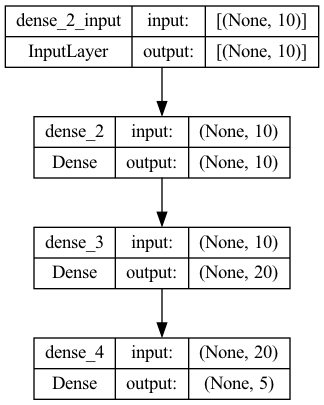

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Functional API

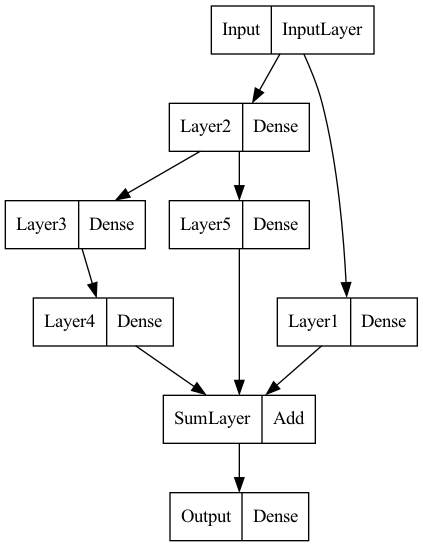

In [15]:
#  сециальный input слой, показывает keras куда "положить" данные при использовании модели
input_layer = tf.keras.layers.Input(shape=(10,), name='Input')
l1 = Dense(10, name='Layer1') # определили первый слой
l1_output = l1(input_layer) # соединили его с инпутом

l2_output = Dense(10, name='Layer2')(input_layer) # дальше определяем чуть компактнее
l3_output = Dense(10, name='Layer3')(l2_output)
l4_output = Dense(10, name='Layer4')(l3_output)
l5_output = Dense(10, name='Layer5')(l2_output)

# специальный слой, который сложит выходы всех слоев, которые ему передали
sum_output = tf.keras.layers.Add(name='SumLayer')([l1_output, l4_output, l5_output])

# выходной слой
output = Dense(10, name='Output')(sum_output)

# создаем модель, нужно показать, что мы считаем входом а нашу модель, а что выходом
model = tf.keras.Model(inputs=input_layer, outputs=output)

tf.keras.utils.plot_model(model, show_shapes=False)

In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 10)]         0           []                               
                                                                                                  
 Layer2 (Dense)                 (None, 10)           110         ['Input[0][0]']                  
                                                                                                  
 Layer3 (Dense)                 (None, 10)           110         ['Layer2[0][0]']                 
                                                                                                  
 Layer1 (Dense)                 (None, 10)           110         ['Input[0][0]']                  
                                                                                            

In [17]:
# если мы укажем в output слой, для вычисления которого не нужно было считать весь граф -- 
# keras автоматически обрежет граф.
model = tf.keras.Model(inputs=input_layer, outputs=l4_output)

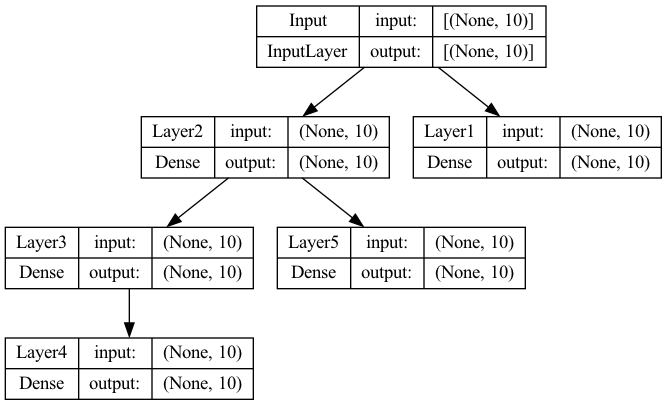

In [23]:
tf.keras.utils.plot_model(model, show_shapes=True)

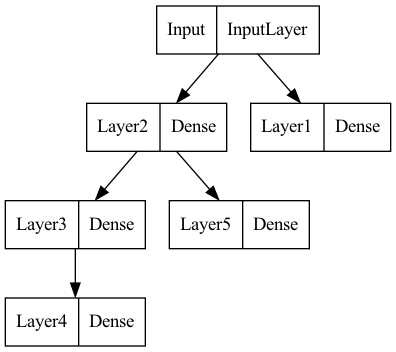

In [22]:
# можно указакть несколько выходов
model = tf.keras.Model(inputs=input_layer, outputs=[l4_output, l5_output, l1_output])

tf.keras.utils.plot_model(model, show_shapes=False)